In [3]:
#/***************************************************************************
# *   Copyright (C) 2022 -- 2023 by Marek Sawerwain                         *
# *                                  <M.Sawerwain@gmail.com>                *
# *                                  <M.Sawerwain@issi.uz.zgora.pl>         *
# *                                                                         *
# *                              by Joanna Wiśniewska                       *
# *                                  <Joanna.Wisniewska@wat.edu.pl>         *
# *                                                                         *
# *   Part of the Quantum Distance Classifier:                              *
# *         https://github.com/qMSUZ/QDCLIB                                 *
# *                                                                         *
# *   Licensed under the EUPL-1.2-or-later, see LICENSE file.               *
# *                                                                         *
# *   Licensed under the EUPL, Version 1.2 or - as soon they will be        *
# *   approved by the European Commission - subsequent versions of the      *
# *   EUPL (the "Licence");                                                 *
# *                                                                         *
# *   You may not use this work except in compliance with the Licence.      *
# *   You may obtain a copy of the Licence at:                              *
# *                                                                         *
# *   https://joinup.ec.europa.eu/software/page/eupl                        *
# *                                                                         *
# *   Unless required by applicable law or agreed to in writing,            *
# *   software distributed under the Licence is distributed on an           *
# *   "AS IS" basis, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND,          *
# *   either express or implied. See the Licence for the specific           *
# *   language governing permissions and limitations under the Licence.     *
# *                                                                         *
# ***************************************************************************/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import qdclib as qdcl

In [2]:
seed_value = 1234
np.random.seed( seed_value )

In [3]:
print("\n\nBasic example of kmeans clustering states of 20 single qubits")
print("states contains only real amplitudes")
print("seed value:", seed_value)
print("\n")



Basic example of kmeans clustering states of 20 single qubits
states contains only real amplitudes
seed value: 1234




In [4]:
d = qdcl.create_spherical_probes(20, 2)

print("\nNorms of each point in d:")
print(" " * 4,np.linalg.norm(d, axis=1))


Norms of each point in d:
     [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]




Plot all states on unit circle


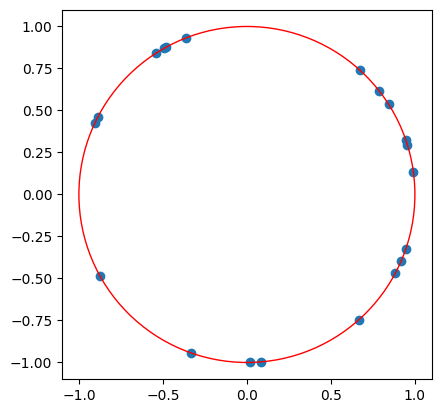

In [7]:
#
# Scatter plot of 2D data 
#

print("\n\nPlot all states on unit circle")

fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1])
ax.add_patch(circle)

Norms of each point in centers:
     [1. 1. 1. 1.]
Plot all states on unit circle
with centers after clustering


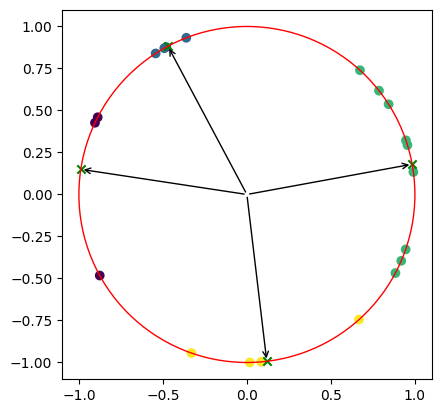

In [8]:
#
# four clusters
#

n_clusters = 4
labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.COSINE_DISTANCE )

print("Norms of each point in centers:")
print(" " * 4,np.linalg.norm(centers, axis=1))

print("Plot all states on unit circle")
print("with centers after clustering")

fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1], c=labels)
ax.scatter(centers[:, 0], centers[:, 1], marker='x', color='g')
for idx in range(n_clusters):
    ax.annotate("", xy=(centers[idx, 0], centers[idx, 1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.add_patch(circle)

In [9]:
print("Distance between probes and centers for each classes")
t = qdcl.create_distance_table( d, centers, labels, n_clusters, qdcl.cosine_distance )
#t = qdcl.create_distance_table( d, centers, labels, n_clusters, qdcl.dot_product_as_distance )
print("")
print(t)

Distance between probes and centers for each classes

[[2.06192782e-01 0.00000000e+00]
 [4.19976204e-02 0.00000000e+00]
 [5.30596034e-02 0.00000000e+00]
 [3.05691638e-04 1.00000000e+00]
 [5.80659617e-05 1.00000000e+00]
 [7.24371035e-03 1.00000000e+00]
 [3.58882465e-03 1.00000000e+00]
 [1.67475802e-01 2.00000000e+00]
 [1.10352640e-03 2.00000000e+00]
 [2.14783417e-01 2.00000000e+00]
 [1.15283193e-01 2.00000000e+00]
 [1.29326952e-01 2.00000000e+00]
 [1.07442526e-02 2.00000000e+00]
 [2.04699330e-01 2.00000000e+00]
 [6.86334042e-03 2.00000000e+00]
 [7.35993620e-02 2.00000000e+00]
 [1.02005481e-01 3.00000000e+00]
 [5.49150094e-04 3.00000000e+00]
 [5.12705405e-03 3.00000000e+00]
 [1.81337817e-01 3.00000000e+00]]
